
#  ***Facebook Live Sellers in Thailand Dataset***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Facebook_Marketplace_data.csv')

QUESTION - 1 : How does the time of upload(`status_published`)  affects the `num_reaction`?

ANSWER-1:

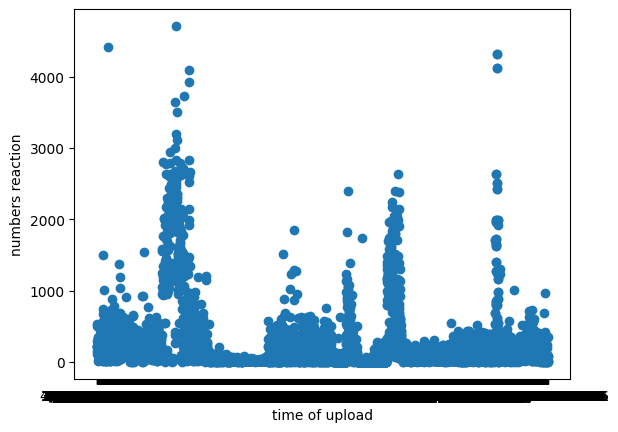

In [ ]:
plt.scatter(df['status_published'], df['num_reactions'])
plt.xlabel('time of upload')
plt.ylabel('numbers reaction')
plt.show()

QUESTION-2: Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

ANSWER - 2 : THE CORRELATION OF num_reactions with the rest engagement metrics is as described sequentially below.

In [ ]:
c = df['num_reactions'].corr(df['num_comments'])
print(f"The correlation strength between num_reactions and num_comments is {c}")
print("And hence this is a positive correlation ")

The correlation strength between num_reactions and num_comments is 0.15084290344217643
And hence this is a positive correlation 


In [ ]:
c = df['num_reactions'].corr(df['num_shares'])
print(f"The correlation strength between num_reactions and num_shares is {c}")
print("And hence this is a positive correlation ")

The correlation strength between num_reactions and num_shares is 0.250722516628319
And hence this is a positive correlation 


In [ ]:
c = df['num_reactions'].corr(df['num_likes'])
print(f"The correlation strength between num_reactions and num_likes is {c}")
print("And hence this is a positive correlation ")

The correlation strength between num_reactions and num_likes is 0.9949233703319167
And hence this is a positive correlation 


QUESTION - 3 : Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

+

QUESTION - 4 :

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

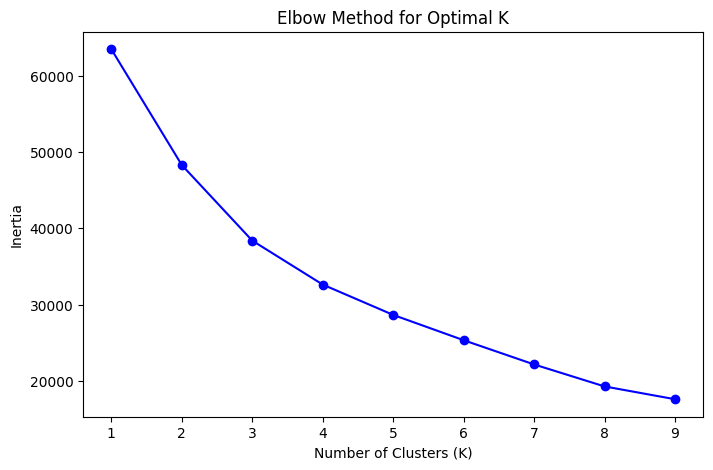

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
features = df.iloc[:,list(range(3,12))]


scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

clusters = kmeans.predict(scaled_data)
features['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
print("Cluster Centers (in scaled units):\n", kmeans.cluster_centers_)
print("Inertia (Sum of squared distances):", kmeans.inertia_)

Cluster Centers (in scaled units):
 [[-0.25132849 -0.13279108 -0.13915302 -0.24418884 -0.13169885 -0.08482994
  -0.0901906  -0.05942104 -0.08141775]
 [ 1.20355309  3.3651991   3.55859537  0.87052666  3.41794709  1.81112129
   2.28734426  1.57450635  2.11233342]
 [ 3.44405643 -0.18325934 -0.21564903  3.56552625 -0.24077535  0.13145062
  -0.12573702 -0.13238837 -0.14835034]]
Inertia (Sum of squared distances): 38372.99772386941


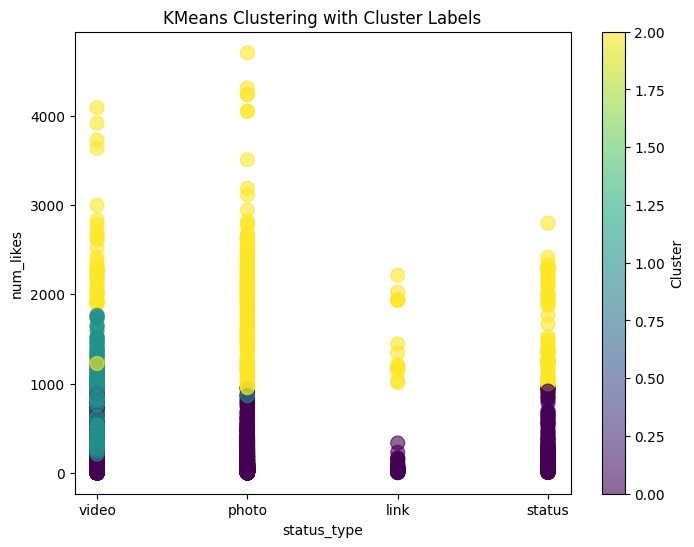

In [ ]:
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Scatter plot for data points
plt.scatter(df['status_type'], features['num_likes'], c=features['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.6)

# Add labels and title
plt.xlabel('status_type')
plt.ylabel('num_likes')
plt.title('KMeans Clustering with Cluster Labels')

# Show color bar for cluster labels
plt.colorbar(label='Cluster')

# Display the plot
plt.show()


QUESTION - 5 : What is the count of different types of posts in the dataset?

In [ ]:
print(len(df['status_type'].unique()))

4


QUESTION - 6 :	What is the average value of num_reaction, num_comments, num_shares for each post type?

ANSWER - 6 :

In [ ]:
import pandas as pd

unique_values = df['status_type'].unique()

sub_dfs = {}

for value in unique_values:
    sub_dfs[value] = df[df['status_type'] == value]

for key, sub_df in sub_dfs.items():
    print(f"\nRequired Averages for '{key}':")
    print("Average number of reactions: ",sub_df['num_reactions'].mean())
    print("Average number of comments: ",sub_df['num_comments'].mean())
    print("Average number of shares: ",sub_df['num_shares'].mean())


Required Averages for 'video':
Average number of reactions:  283.4095972579263
Average number of comments:  642.478149100257
Average number of shares:  115.67994858611826

Required Averages for 'photo':
Average number of reactions:  181.29034514925374
Average number of comments:  15.993470149253731
Average number of shares:  2.5538712686567164

Required Averages for 'link':
Average number of reactions:  370.14285714285717
Average number of comments:  5.698412698412699
Average number of shares:  4.396825396825397

Required Averages for 'status':
Average number of reactions:  438.78356164383564
Average number of comments:  36.23835616438356
Average number of shares:  2.558904109589041
